In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("rendimientosegundaversion_formateado.csv")

### Tiempo Medio por URL

In [2]:
urls = df.groupby("URL").sum()

print("MEDIA: " + str(urls.mean()["TIME"]) + " ms")
print("DESVIACION TIPICA: " + str(urls.std()["TIME"]) + " ms")

MEDIA: 7172.481356250116 ms
DESVIACION TIPICA: 7889.274592050425 ms


### Percentil 90

In [3]:
print("Percentil 90: " + str(urls.quantile(0.9)["TIME"]) + " ms")

Percentil 90: 14657.920199999999 ms


### Tiempo Medio por Vista

                  TIME
VISTA                 
articulo   7814.186707
categoria  3175.619878
grupo      1793.310754
                  TIME
VISTA                 
articulo   8107.511812
categoria  3149.120920
grupo      1962.343126


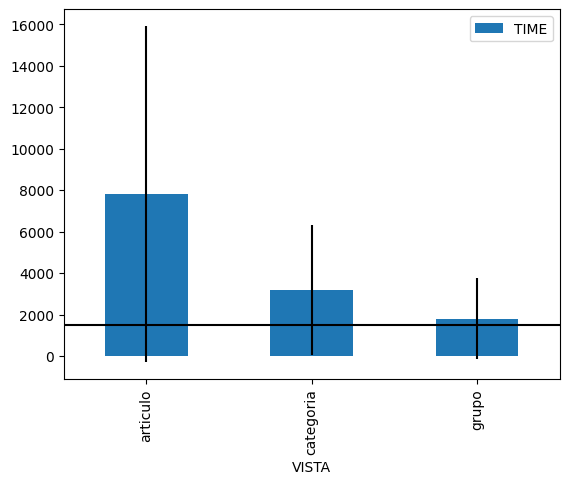

In [30]:
vista = df.groupby(["URL", "VISTA"]).sum()

print(vista.groupby("VISTA").mean())
print(vista.groupby("VISTA").std())

vista.groupby("VISTA").mean().plot(kind="bar", yerr = vista.groupby("VISTA").std())

plt.axhline(y=1500, color='black', linestyle='-')

### Tiempo Medio por Secciones en Categorias

                                        TIME
SECCION                                     
Libra                             525.842134
Permisos                          171.346265
cacheoPreciosTime                 843.019717
carruselesGroupModeTime           617.681249
carruselesTime                    846.835811
contexTime                        465.959273
creacionResponseTime              379.373683
fechaCalculoNumeroArticulosTime   509.041286
obtencionGruposTime               119.599333
ocultarFiltrosTime                945.731206
ordenadoItemsTime                 157.264290
ordenadoTime                      163.114384
renderizadoTime                   631.886645
seleccionArticulosCarruselesTime  310.544000
serializacionCarruselesTime       150.994417
updateCacheTime                   258.858929
                                         TIME
SECCION                                      
Libra                              481.976912
Permisos                            13.831855
cacheo

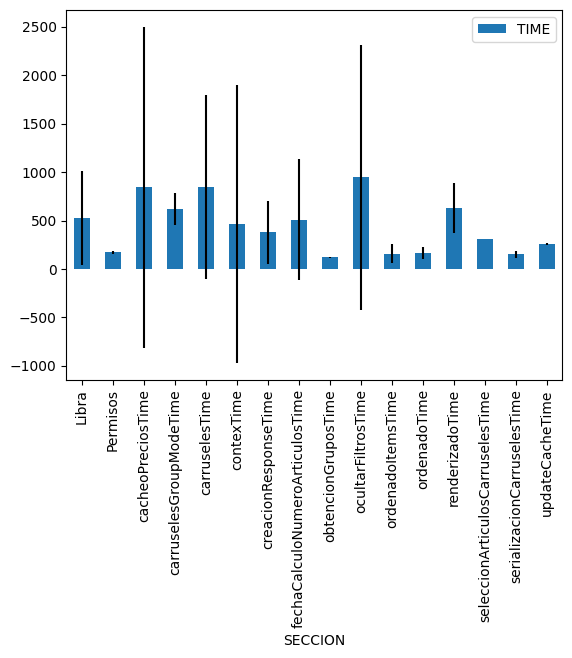

In [6]:
categoria = df[df["VISTA"] == "categoria"]

categoria_filtrado = categoria[(categoria["TIME"] > 100) & (categoria["SECCION"] != "Renderizado")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std())

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))


### Tiempo Medio por Secciones en Grupos

                             TIME
SECCION                          
Datos                  154.928000
Libra                  302.595172
Permisos               136.575184
cacheoPreciosTime      303.336914
consultaArbolTime      101.414250
generacionFiltrosTime  803.243606
getObjectTime          154.758000
ordenarItemsTime       124.620526
                              TIME
SECCION                           
Datos                     0.000000
Libra                   197.345128
Permisos                 11.315420
cacheoPreciosTime       198.451050
consultaArbolTime         1.096934
generacionFiltrosTime  1066.051093
getObjectTime             0.000000
ordenarItemsTime         17.023741


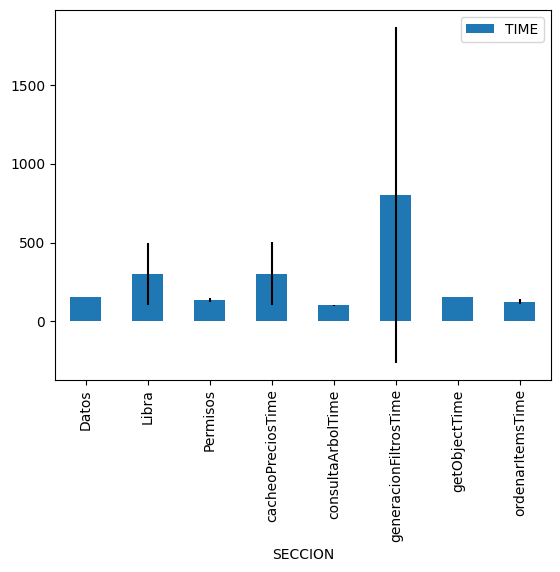

In [6]:
df = df.dropna()

grupo = df[df["VISTA"] == "grupo"]

grupo_filtrado = grupo[(grupo["TIME"] > 100) & (grupo["SECCION"] != "Renderizado")]

grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std())

print(grupo_filtrado.groupby("SECCION").mean())
print(grupo_filtrado.groupby("SECCION").std(ddof=0))

### Tiempo Medio por Secciones en Articulos

                              TIME
SECCION                           
Datos                   235.619786
Libra                   899.643599
Permisos                137.327524
articuloArbolTime       133.400562
atributosGrupoTime      490.082559
cachePrecioTime         155.041573
contextoTime            196.644706
generarCarruselesTime  3489.521566
                              TIME
SECCION                           
Datos                    50.275085
Libra                   190.409851
Permisos               1010.719881
articuloArbolTime         7.785037
atributosGrupoTime      387.876739
cachePrecioTime          44.465592
contextoTime             29.488663
generarCarruselesTime  4049.045985


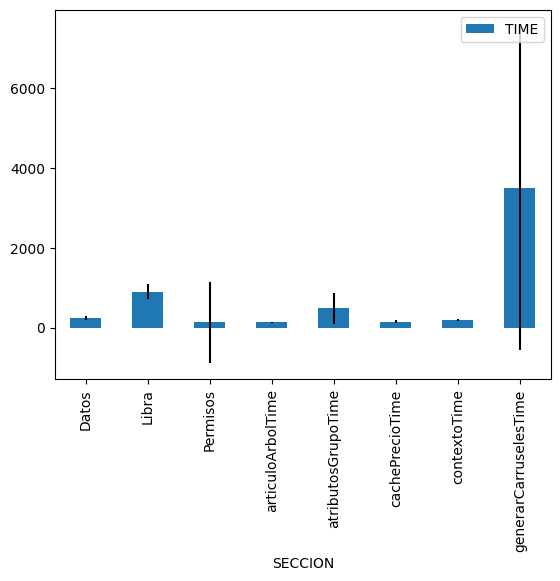

In [7]:
articulo = df[df["VISTA"] == "articulo"]

articulo_filtrado = articulo[(articulo["TIME"] > 100) & (articulo["SECCION"] != "Renderizado")]

articulo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = articulo_filtrado.groupby("SECCION").std())

print(articulo_filtrado.groupby("SECCION").mean())
print(articulo_filtrado.groupby("SECCION").std(ddof=0))

### Tiempo Medio Libra

               TIME
SECCION            
Libra    835.619728
               TIME
SECCION            
Libra    273.389462


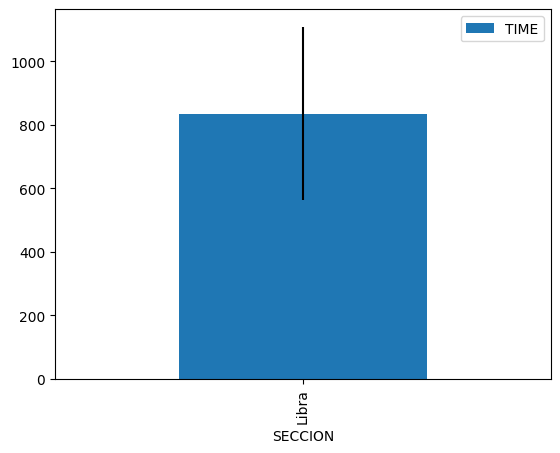

In [8]:
libra = df[df["SECCION"] == "Libra"].groupby("SECCION").mean()

libra.plot(kind="bar", yerr=df[df["SECCION"] == "Libra"].groupby("SECCION").std())

print(libra)
print(df[df["SECCION"] == "Libra"].groupby("SECCION").std())


In [110]:

categorias = df[df["VISTA"] == "categoria"]
grupos = df[df["VISTA"] == "grupo"]
articulos = df[df["VISTA"] == "articulo"]

categorias_filtradas = categorias.groupby("SECCION", as_index=False).mean()
grupos_filtrados = grupos.groupby("SECCION", as_index=False).mean()
articulos_filtrados = articulos.groupby("SECCION", as_index=False).mean()

print(categorias_filtradas)
print(grupos_filtrados)
print(articulos_filtrados)

                             SECCION         TIME
0                              Datos    11.626568
1                              Libra   519.296563
2                           Permisos    69.891229
3                        Renderizado  1027.419198
4               addCategoriaJsonTime     0.773610
5                          banerTime     0.077502
6                  cacheoPreciosTime   834.578830
7            carruselesGroupModeTime   617.681249
8                     carruselesTime   846.835811
9                         contexTime    54.486849
10              creacionResponseTime   242.320578
11   fechaCalculoNumeroArticulosTime    59.339219
12                filtradoGruposTime     0.878685
13                      filtradoTime     1.849570
14                     getObjectTime     4.533699
15                      metatagsTime     0.048640
16                        navCatTime     0.183224
17                        navcatTime     7.031240
18               obtencionGruposTime     4.075605


In [122]:
#Datos
datos_grupos = int(grupos_filtrados[grupos_filtrados["SECCION"] == "Datos"]["TIME"])
datos_articulos = int(articulos_filtrados[articulos_filtrados["SECCION"] == "Datos"]["TIME"])

#Libra
libra_grupos = int(grupos_filtrados[grupos_filtrados["SECCION"] == "Libra"]["TIME"])
libra_articulos = int(articulos_filtrados[articulos_filtrados["SECCION"] == "Libra"]["TIME"])
libra_categorias = int(categorias_filtradas[categorias_filtradas["SECCION"] == "Libra"]["TIME"])

#Permisos
permisos_categorias = int(categorias_filtradas[categorias_filtradas["SECCION"] == "Permisos"]["TIME"])
permisos_articulos = int(articulos_filtrados[articulos_filtrados["SECCION"] == "Permisos"]["TIME"])
permisos_grupos = int(grupos_filtrados[grupos_filtrados["SECCION"] == "Permisos"]["TIME"])

#Cacheo Precios
cacheo_precios_categorias = int(categorias_filtradas[categorias_filtradas["SECCION"] == "cacheoPreciosTime"]["TIME"])
cacheo_precios_grupos = int(grupos_filtrados[grupos_filtrados["SECCION"] == "cacheoPreciosTime"]["TIME"])


print(cacheo_precios_categorias)
print(cacheo_precios_grupos)

834
279


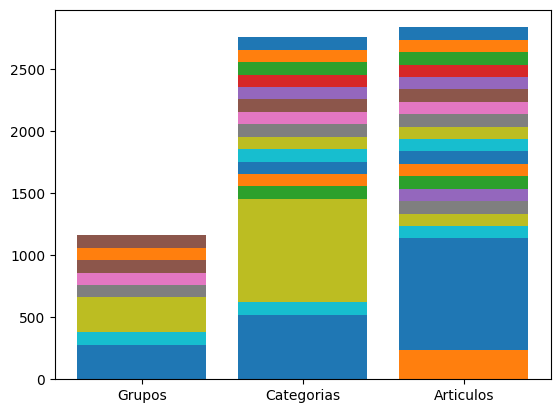

In [123]:
data = pd.DataFrame({"Datos" : [datos_grupos, 0, datos_articulos],
                      "Libra" : [libra_grupos, libra_categorias, libra_articulos],
                      "Permisos" : [100, 100, 100],
                      "CacheoPrecios" : [cacheo_precios_grupos, cacheo_precios_categorias, 100],
                      "ConsultarArbol" : [100, 0, 100],
                      "GenerarFiltros" : [100, 0, 0],
                      "ObtenerObjetos" : [100, 0, 0],
                      "AtributosGrupo" : [0, 0, 100],
                      "GenerarResultado" : [0, 0, 0],
                      "GenerarCarruseles" : [0, 100, 100],
                      "CarruselesModoGrupo" : [100, 100, 100],
                      "CrearContexto" : [0, 100, 100],
                      "CrearRespuesta" : [0, 100, 100],
                      "NumeroArticulos" : [0, 100, 100],
                      "ObtencionGrupos" : [0, 100, 100],
                      "OcultarFiltros" : [0, 100, 100],
                      "OrdenarItems" : [100, 100, 100],
                      "Ordenado" : [0, 100, 100],
                      "Renderizado" : [0, 100, 100],
                      "SeleccionCarruseles" : [0, 100, 100],
                      "SerializacionCarruseles" : [0, 100, 100],
                      "UpdateCache" : [0, 100, 100]
                      },
                    index=('Grupos', "Categorias", "Articulos",))

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos + data.OcultarFiltros + data.OrdenarItems + data.Ordenado + data.Renderizado + data.SeleccionCarruseles + data.SerializacionCarruseles + data.UpdateCache, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos + data.OcultarFiltros + data.OrdenarItems + data.Ordenado + data.Renderizado + data.SeleccionCarruseles + data.SerializacionCarruseles, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos + data.OcultarFiltros + data.OrdenarItems + data.Ordenado + data.Renderizado + data.SeleccionCarruseles, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos + data.OcultarFiltros + data.OrdenarItems + data.Ordenado + data.Renderizado, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos + data.OcultarFiltros + data.OrdenarItems + data.Ordenado, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos + data.OcultarFiltros + data.OrdenarItems, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos + data.OcultarFiltros, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos + data.ObtencionGrupos, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta + data.NumeroArticulos, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto + data.CrearRespuesta, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo + data.CrearContexto, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles + data.CarruselesModoGrupo, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado + data.GenerarCarruseles, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo + data.GenerarResultado, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos + data.AtributosGrupo, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros + data.ObtenerObjetos, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol + data.GenerarFiltros, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios + data.ConsultarArbol, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos + data.CacheoPrecios, label='Datos')

plt.bar(data.index, data.Datos + data.Libra + data.Permisos, label='Datos')

plt.bar(data.index, data.Datos + data.Libra, label='Datos')

plt.bar(data.index, data.Datos, label='Datos')

plt.show()